In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_w_features = pd.read_csv('/content/drive/MyDrive/elective_text_recognize/ЛР3/tfidf_vectorized.csv', sep=',')
df_w_targets = pd.read_csv('/content/drive/MyDrive/elective_text_recognize/ЛР2/my_submission.csv', sep=',')

In [ ]:
target = df_w_targets['sentiment_digits']

Видим что в обучающей выборке преобладает негативный сентимент. Но выборка все равно является сбалансированной.

0.0    333
2.0    140
1.0     62
Name: sentiment_digits, dtype: int64

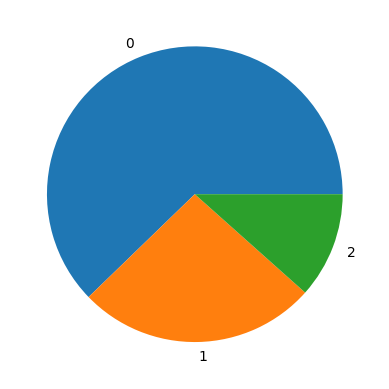

In [ ]:
plt.pie(target.value_counts(), labels=[0, 1, 2])
target.value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_w_features,
    target,
    test_size=0.2,
    shuffle = True,
    random_state=42,
    stratify = None)

In [ ]:
scorer = make_scorer(f1_score, average='weighted')

RandomForestClassifier

Произведем подбор гиперпараметров с помощью GridSearchCV, в качестве метрики будем использовать f1_score поскольку он подходим для многоклассовой классификации и оптимальное значение, используя presicion и recall. Также мы можем использовать здесь f1_score поскольку у нас сбалансированный target, плюсом к этому мы используем параметр 'weighted' для усреднения по количеству обьектов в каждом классе.

In [ ]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'n_jobs': [-1],
    'min_samples_split' : range(1, 25, 4),
    'n_estimators' : [100, 150, 200, 250, 300]
}



rfc = RandomForestClassifier(random_state=42)
grid_search_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, scoring=scorer)
grid_search_rfc.fit(X_train, y_train)
grid_search_rfc.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_split': 5,
 'n_estimators': 150,
 'n_jobs': -1}

In [ ]:
rfc_clf =  RandomForestClassifier(
        n_estimators = 150,
        criterion = 'entropy',
        max_depth = 12,
        class_weight = 'balanced',
        random_state = 42
)

rfc_clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, n_estimators=150, random_state=42)

In [ ]:
y_pred = rfc_clf.predict(X_test)

In [ ]:
f1_score(average='weighted', y_true=y_test, y_pred=y_pred)

0.8291694663327428

RandomTreeClassifier показал результат в 0.8291694663327428, я считаю данный результат хорошим поскольку выборка данных достаточно маленькая (всего 500 обьектов), при большей выборке, модель показала бы лучший результат.

LogisticRegression

In [ ]:
parameters = {
    'penalty': ["l2", None],
    'solver': ['lbfgs', 'newton-cg', 'sag',"saga"],
    'C': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_iter': [100, 500, 1000],
    'n_jobs': [-1]
}
# ‘lbfgs’ - [‘l2’, None]
# ‘liblinear’ - [‘l1’, ‘l2’]
# ‘newton-cg’ - [‘l2’, None]
# ‘newton-cholesky’ - [‘l2’, None]
# ‘sag’ - [‘l2’, None]
# ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]
# выбраны только ‘newton-cg’, ‘sag’, ‘saga’ и ‘lbfgs поскольку они подходят для мультиклассовой классификации
lr_clf = LogisticRegression(random_state=42)
grid_search_clf = GridSearchCV(lr_clf, param_grid=parameters, cv=5,scoring=scorer)
grid_search_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.3],
                         'max_iter': [100, 500, 1000], 'n_jobs': [-1],
                         'penalty': ['l2', None],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring=make_scorer(f1_score, average=weighted))

In [ ]:
grid_search_clf.best_params_

{'C': 0.001, 'max_iter': 100, 'n_jobs': -1, 'penalty': None, 'solver': 'lbfgs'}

In [ ]:
best_lr_clf = LogisticRegression(C=0.001, max_iter= 100, n_jobs = -1, penalty = None, solver = 'lbfgs')

In [ ]:
best_lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.001, n_jobs=-1, penalty=None)

In [ ]:
y_pred = best_lr_clf.predict(X_test)
f1_score(average='weighted', y_true=y_test, y_pred=y_pred)

0.9240272432960722

Модель Логистической регрессии показала результат 0.9240272432960722, что является очень хорошим показателем.

Catboost


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# parameters = {

#     'depth': [4, 6, 8, 10],
#     'learning_rate': [0.005, 0.01, 0.06, 0.1],
#     'iterations': [100, 500, 1000],
#     'l2_leaf_reg': [1, 3, 5, 7, 9],
#     'border_count': [32, 64, 128],
#     'bagging_temperature': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
#     'random_strength': [0, 1, 2, 3, 4, 5]
# }

# learning_rate: скорость обучения модели.
# iterations: количество итераций градиентного бустинга.
# depth: глубина деревьев решений.
# l2_leaf_reg: коэффициент регуляризации L2.
# border_count: число границ разбиения для дискретизации числовых признаков.
# bagging_temperature: температура для сэмплирования объектов (используется в режиме Bootstrap Aggregating)
# random_strength: мощность случайного сдвига признаков.


Catboost_clf = CatBoostClassifier(loss_function='MultiClass', depth=8, learning_rate=0.06, iterations=500, l2_leaf_reg=5, border_count=32, bagging_temperature=0.4, random_strength=2)

# grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring=scorer)
# grid_search.fit(X_train, y_train)


In [ ]:
Catboost_clf.fit(X_train, y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0675095	total: 237ms	remaining: 1m 58s
1:	learn: 1.0405483	total: 454ms	remaining: 1m 53s
2:	learn: 1.0224793	total: 637ms	remaining: 1m 45s
3:	learn: 1.0025850	total: 845ms	remaining: 1m 44s
4:	learn: 0.9839096	total: 1.04s	remaining: 1m 43s
5:	learn: 0.9705610	total: 1.29s	remaining: 1m 45s
6:	learn: 0.9546660	total: 1.64s	remaining: 1m 55s
7:	learn: 0.9391700	total: 2.11s	remaining: 2m 9s
8:	learn: 0.9283374	total: 2.49s	remaining: 2m 15s
9:	learn: 0.9185381	total: 2.82s	remaining: 2m 18s
10:	learn: 0.9068256	total: 3.12s	remaining: 2m 18s
11:	learn: 0.8977545	total: 3.56s	remaining: 2m 24s
12:	learn: 0.8868469	total: 3.91s	remaining: 2m 26s
13:	learn: 0.8758487	total: 4.31s	remaining: 2m 29s
14:	learn: 0.8698957	total: 4.72s	remaining: 2m 32s
15:	learn: 0.8590254	total: 5.04s	remaining: 2m 32s
16:	learn: 0.8468748	total: 5.45s	remaining: 2m 34s
17:	learn: 0.8388331	total: 5.83s	remaining: 2m 36s
18:	learn: 0.8337236	total: 6.22s	remaining: 2m 37s
19:	learn: 0.8275181	to

In [ ]:
y_pred = Catboost_clf.predict(X_test)

In [ ]:
f1_score(average='weighted', y_true=y_test, y_pred=y_pred)

0.8406341922787516